**In this file we are using K-Means clustering to color compress the images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors. By color compressing the images, we can reduce the file size for storing in our databases (Consedering the details of the image is not important)**

Importing and installing the required libraries

In [124]:
!pip install pillow
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request
import io
import requests
from io import BytesIO
import numpy as np
import cv2 as cv 
from skimage import io

Importing and viewing the sample image

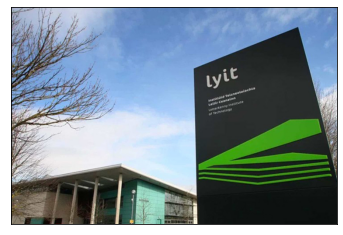

In [125]:
urllib.request.urlretrieve(
  'https://raw.githubusercontent.com/VinayakaShivakumar/ML_Dataset/main/K-Means_Clustering/LYIT.jpg',
   "LYIT.jpg")
lyit = Image.open("LYIT.jpg")
ax = plt.axes(xticks=[], yticks=[])
image = cv.cvtColor(cv.imread('LYIT.jpg'), cv.COLOR_BGR2RGB)
ax.imshow(image)

Reshaping the image and Rescaling the colors, so that they lie between 0 and 1 value

In [126]:
data = image
data = data / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

visualizing the image pixels in the RGB color space, using a subset of 10,000 pixels:

In [127]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

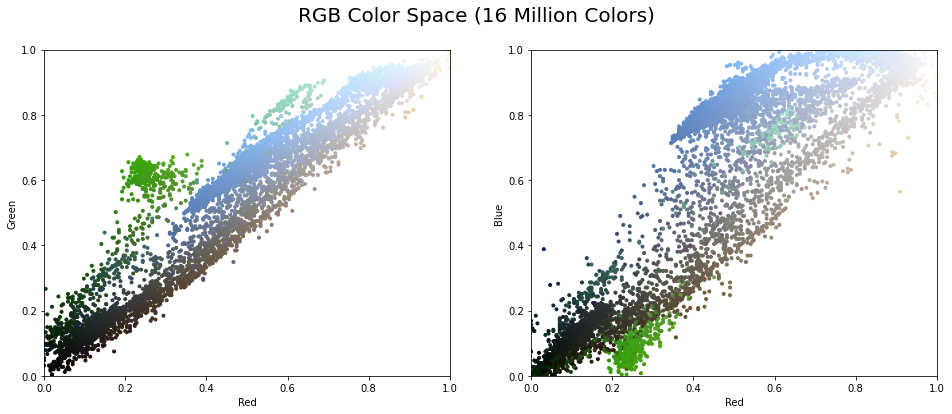

In [128]:
plot_pixels(data, title='RGB Color Space (16 Million Colors)')

Reducing these RGB (16 million colors) to just 16 colors, using a k-means clustering across the pixel space, where each pixel is assigned the color of its closest cluster center

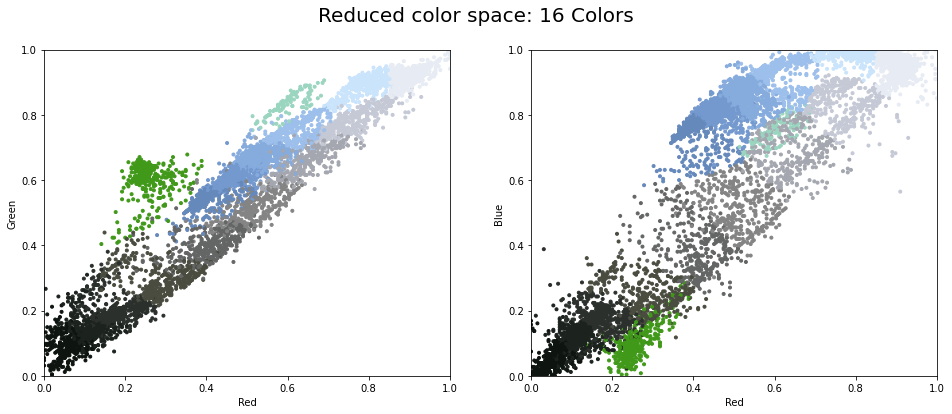

In [129]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 Colors")

Plotting Original Image and Recolred image to view the color difference

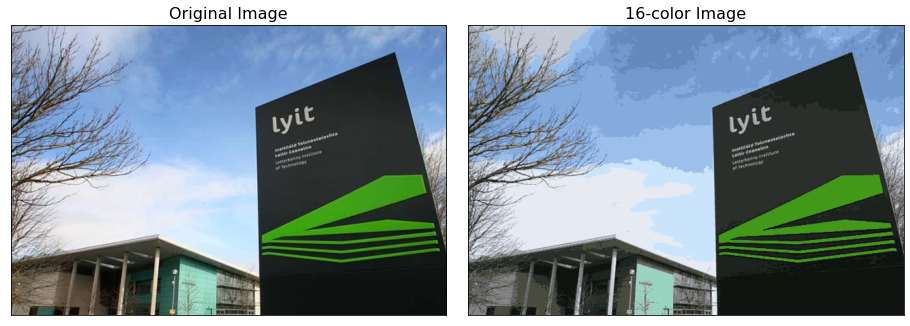

In [130]:
lyit_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(lyit_recolored)
ax[1].set_title('16-color Image', size=16);